# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
%matplotlib inline

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/Users/theluggage/python-api-challenge/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

# units = "imperial"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="

# # Get weather data
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# # Print the response object to the console
print(requests.get(url))

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

<Response [401]>


NameError: name 'weather_json' is not defined

In [4]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}&units={units}
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


#Create recepticles for the data to populate when the loop is run.
city_names = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
countries = []
dates = []

#Create where we are starting and a counter to add one as we go along the loop and hopefully get over 500 entries required..
index_start = 0
counter = 1

print("Beginning Data Retrieval")
print("-----------------------------")

#Use a loop and enumerate to create a list that will loop and populate the recepticles above. 
#Put a try/except, so we can clean the data in a dataframe after the dataframe is made.
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        
        city_names.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
 
 #Use an if statement to add on one city from the random cities as loops.       
        if index_start > 504:
            index_start = 0
            counter = counter + 1
    
        else:
            index_start = index_start + 1
            
        print(f"Processing Record {index_start} of Set {counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 : pochutla
Processing Record 2 of Set 1 : bluff
Processing Record 3 of Set 1 : kodiak
Processing Record 4 of Set 1 : airai
Processing Record 5 of Set 1 : avarua
Processing Record 6 of Set 1 : skibbereen
Processing Record 7 of Set 1 : norman wells
Processing Record 8 of Set 1 : morden
Processing Record 9 of Set 1 : bandarbeyla
Processing Record 10 of Set 1 : butaritari
Processing Record 11 of Set 1 : oriximina
Processing Record 12 of Set 1 : dikson
Processing Record 13 of Set 1 : saint-philippe
Processing Record 14 of Set 1 : portland
Processing Record 15 of Set 1 : ushuaia
Processing Record 16 of Set 1 : vulcan
Processing Record 17 of Set 1 : tabuk
Processing Record 18 of Set 1 : arona
Processing Record 19 of Set 1 : cabo san lucas
Processing Record 20 of Set 1 : pisco
Processing Record 21 of Set 1 : tiksi
Processing Record 22 of Set 1 : port alfred
Processing Record 23 of Set 1 : puerto ayora
Processin

Processing Record 183 of Set 1 : berdigestyakh
Processing Record 184 of Set 1 : szczytno
Processing Record 185 of Set 1 : morococha
Processing Record 186 of Set 1 : yellowknife
Processing Record 187 of Set 1 : nabire
Processing Record 188 of Set 1 : great yarmouth
Processing Record 189 of Set 1 : fortuna
Processing Record 190 of Set 1 : nikolskoye
Processing Record 191 of Set 1 : sur
Processing Record 192 of Set 1 : port elizabeth
Processing Record 193 of Set 1 : schruns
Processing Record 194 of Set 1 : half moon bay
Processing Record 195 of Set 1 : bethel
Processing Record 196 of Set 1 : yar-sale
Processing Record 197 of Set 1 : kantunilkin
Processing Record 198 of Set 1 : new norfolk
Processing Record 199 of Set 1 : svetlaya
Processing Record 200 of Set 1 : constitucion
Processing Record 201 of Set 1 : pacific grove
Processing Record 202 of Set 1 : goderich
Processing Record 203 of Set 1 : arraial do cabo
Processing Record 204 of Set 1 : san joaquin
Processing Record 205 of Set 1 : b

Processing Record 369 of Set 1 : manaure
Processing Record 370 of Set 1 : deputatskiy
Processing Record 371 of Set 1 : mayumba
City not found. Skipping...
Processing Record 372 of Set 1 : rio claro
Processing Record 373 of Set 1 : novomykolayivka
Processing Record 374 of Set 1 : morgan city
Processing Record 375 of Set 1 : farmington
Processing Record 376 of Set 1 : hithadhoo
Processing Record 377 of Set 1 : tygda
Processing Record 378 of Set 1 : guerrero negro
Processing Record 379 of Set 1 : tautira
Processing Record 380 of Set 1 : elko
Processing Record 381 of Set 1 : nsanje
Processing Record 382 of Set 1 : gimli
Processing Record 383 of Set 1 : chegdomyn
Processing Record 384 of Set 1 : kankakee
Processing Record 385 of Set 1 : nanzhou
Processing Record 386 of Set 1 : chernyshevskiy
Processing Record 387 of Set 1 : maceio
Processing Record 388 of Set 1 : marsh harbour
Processing Record 389 of Set 1 : manzhouli
Processing Record 390 of Set 1 : dingle
Processing Record 391 of Set 1 :

Processing Record 50 of Set 2 : pangai
City not found. Skipping...
Processing Record 51 of Set 2 : dzhebariki-khaya
Processing Record 52 of Set 2 : rognac
Processing Record 53 of Set 2 : la palma
Processing Record 54 of Set 2 : ocos
Processing Record 55 of Set 2 : chebenki
Processing Record 56 of Set 2 : brookhaven
Processing Record 57 of Set 2 : chiquimula
Processing Record 58 of Set 2 : aswan
Processing Record 59 of Set 2 : kingsport
Processing Record 60 of Set 2 : bukachacha
Processing Record 61 of Set 2 : havelock
Processing Record 62 of Set 2 : ilulissat
Processing Record 63 of Set 2 : bayan
Processing Record 64 of Set 2 : nishihara
Processing Record 65 of Set 2 : simao
Processing Record 66 of Set 2 : neyshabur
Processing Record 67 of Set 2 : sangar
Processing Record 68 of Set 2 : boca do acre
Processing Record 69 of Set 2 : pietarsaari
Processing Record 70 of Set 2 : christchurch
Processing Record 71 of Set 2 : enkoping
Processing Record 72 of Set 2 : manoel urbano
City not found

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame.

city_weather_df = pd.DataFrame({
    "City": city_names,
    "Lat": latitude,
    "Lng": longitude,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": countries,
    "Date": dates
})

city_weather_df




,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,59,99,7.54,MX,1635106966
1,Bluff,-46.6000,168.3333,52.86,92,92,5.99,NZ,1635106718
2,Saint Paul Harbor,57.7900,-152.4072,42.93,86,30,7.78,US,1635106967
3,Airai,-8.9266,125.4092,61.09,86,98,1.39,TL,1635106889
4,Avarua,-21.2078,-159.7750,73.45,68,75,11.50,CK,1635106797
...,...,...,...,...,...,...,...,...,...
576,Enköping,59.6361,17.0777,51.66,83,100,15.95,SE,1635107199
577,Manoel Urbano,-8.8389,-69.2597,93.97,44,100,2.80,BR,1635107200
578,Alcains,39.9164,-7.4566,57.34,53,0,3.29,PT,1635107201
579,Wewak,-3.5534,143.6268,78.67,84,100,3.62,PG,1635107201


In [90]:
#Export dataframe to a CSV

city_weather_df.to_csv('city_weather.csv')

In [7]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
city_weather_df_red = city_weather_df.drop(['City', 'Country'], axis=1)
city_weather_stats = city_weather_df_red.describe(include='all')
city_weather_stats

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,21.968718,17.547574,59.088141,71.765921,55.487091,7.601308,1.635107e+09
std,33.236748,88.667109,21.913592,19.871751,39.918995,5.805364,1.053025e+02
min,-54.800000,-175.200000,-20.720000,11.000000,0.000000,0.000000,1.635107e+09
25%,-6.981100,-60.771800,45.050000,61.000000,11.000000,3.440000,1.635107e+09
50%,26.541200,21.224700,62.470000,75.000000,69.000000,6.260000,1.635107e+09
75%,50.383300,92.750000,77.450000,87.000000,97.000000,10.420000,1.635107e+09
max,78.218600,179.316700,94.950000,100.000000,100.000000,50.640000,1.635107e+09


In [8]:
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,59,99,7.54,MX,1635106966
1,Bluff,-46.6000,168.3333,52.86,92,92,5.99,NZ,1635106718
2,Saint Paul Harbor,57.7900,-152.4072,42.93,86,30,7.78,US,1635106967
3,Airai,-8.9266,125.4092,61.09,86,98,1.39,TL,1635106889
4,Avarua,-21.2078,-159.7750,73.45,68,75,11.50,CK,1635106797
...,...,...,...,...,...,...,...,...,...
576,Enköping,59.6361,17.0777,51.66,83,100,15.95,SE,1635107199
577,Manoel Urbano,-8.8389,-69.2597,93.97,44,100,2.80,BR,1635107200
578,Alcains,39.9164,-7.4566,57.34,53,0,3.29,PT,1635107201
579,Wewak,-3.5534,143.6268,78.67,84,100,3.62,PG,1635107201


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#Ran a loc to isolate the cities that are under 100%.
less_humid = city_weather_df.loc[city_weather_df["Humidity"] < 100]
less_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,59,99,7.54,MX,1635106966
1,Bluff,-46.6000,168.3333,52.86,92,92,5.99,NZ,1635106718
2,Saint Paul Harbor,57.7900,-152.4072,42.93,86,30,7.78,US,1635106967
3,Airai,-8.9266,125.4092,61.09,86,98,1.39,TL,1635106889
4,Avarua,-21.2078,-159.7750,73.45,68,75,11.50,CK,1635106797
...,...,...,...,...,...,...,...,...,...
576,Enköping,59.6361,17.0777,51.66,83,100,15.95,SE,1635107199
577,Manoel Urbano,-8.8389,-69.2597,93.97,44,100,2.80,BR,1635107200
578,Alcains,39.9164,-7.4566,57.34,53,0,3.29,PT,1635107201
579,Wewak,-3.5534,143.6268,78.67,84,100,3.62,PG,1635107201


In [10]:
#Get the statistical information from each column onto one dataframe. Drop the city and county column.
less_humid_red = less_humid.drop(['City', 'Country'], axis=1)
less_humid_stats = less_humid_red.describe(include='all')
less_humid_stats

#This includes the count. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,5.710000e+02
mean,21.577912,16.443923,59.492172,71.271454,55.408056,7.666077,1.635107e+09
std,33.197001,88.683657,21.491498,19.687155,39.980959,5.832461,1.049199e+02
min,-54.800000,-175.200000,-14.080000,11.000000,0.000000,0.000000,1.635107e+09
25%,-7.320700,-63.358200,45.455000,61.000000,11.000000,3.440000,1.635107e+09
50%,25.519800,20.866700,63.140000,75.000000,69.000000,6.530000,1.635107e+09
75%,50.040600,89.393400,77.575000,86.000000,97.000000,10.595000,1.635107e+09
max,78.218600,179.316700,94.950000,99.000000,100.000000,50.640000,1.635107e+09


In [69]:
#  Get the indices of cities that have humidity over 100%.
more_humid = city_weather_df.loc[city_weather_df["Humidity"] > 100]
more_humid

#There are no cities on the city_weather_df that are over 100%. The ten that are not included in the less_humid dataframe have a humidity of exactly 100%.
one_hundred_percent_humid = city_weather_df.loc[city_weather_df["Humidity"] == 100]
one_hundred_percent_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
74,Bilibino,68.0546,166.4372,-20.72,100,95,3.40,RU,1635106995
104,Saskylakh,71.9167,114.0833,-12.33,100,74,4.56,RU,1635106768
183,Szczytno,53.5626,20.9875,31.93,100,90,3.44,PL,1635107024
192,Schruns,47.0709,9.9475,43.48,100,0,5.84,AT,1635107045
234,Bintulu,3.1667,113.0333,77.41,100,40,2.30,MY,1635107060
278,Aykhal,66.0000,111.5000,15.49,100,100,4.83,RU,1635107078
402,Alyangula,-13.8483,136.4192,73.27,100,42,3.44,AU,1635107130
484,Seoul,37.5683,126.9778,47.64,100,54,3.44,KR,1635106867
491,Bereda,43.2686,-7.5406,55.99,100,5,1.70,ES,1635107166
552,Korgen,66.0771,13.8153,48.02,100,100,6.08,NO,1635107190


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

Q1 = city_weather_df['Humidity'].quantile(0.25)
Q3 = city_weather_df['Humidity'].quantile(0.75)
IQR = Q3 - Q1
lower_lim = Q1 - 1.5*IQR
upper_lim = Q3 + 1.5*IQR
lower_lim, upper_lim

#Ran a loc to isolate the cities that are under 100%.
clean_city_data = city_weather_df.loc[(city_weather_df["Humidity"] < 128.5) | (city_weather_df["Humidity"] > 20.5)]
clean_city_data

#There were no outliers.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,59,99,7.54,MX,1635106966
1,Bluff,-46.6000,168.3333,52.86,92,92,5.99,NZ,1635106718
2,Saint Paul Harbor,57.7900,-152.4072,42.93,86,30,7.78,US,1635106967
3,Airai,-8.9266,125.4092,61.09,86,98,1.39,TL,1635106889
4,Avarua,-21.2078,-159.7750,73.45,68,75,11.50,CK,1635106797
...,...,...,...,...,...,...,...,...,...
576,Enköping,59.6361,17.0777,51.66,83,100,15.95,SE,1635107199
577,Manoel Urbano,-8.8389,-69.2597,93.97,44,100,2.80,BR,1635107200
578,Alcains,39.9164,-7.4566,57.34,53,0,3.29,PT,1635107201
579,Wewak,-3.5534,143.6268,78.67,84,100,3.62,PG,1635107201


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

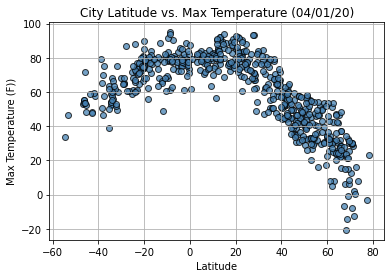

In [14]:
# Generate a scatter plot of latitude vs. max temperature.
plt.scatter(latitude,max_temp, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
plt.grid()
plt.savefig('latvstemp.png')
plt.show()

#This code is analyzing the relationship between the maximum temperature of a city on 4/1/20 and the city's latitude. 
#The curve indicates that--with the exception of 5 outliers where the latitude is -20 to -40--that the max temperature is highest when one is within 20 degrees north or south of the equator.
#There seems to be only a slightly greater drop off in temperature when one goes _proportionally_ further north (this does not count 60 - 80 degrees latitude. The proportional decrease in temperature is greater as one goes farther from the equator, so it makes sense that the temperature drop in the 60-80 range is a lot sharper.)

In [15]:
## Latitude vs. Humidity Plot

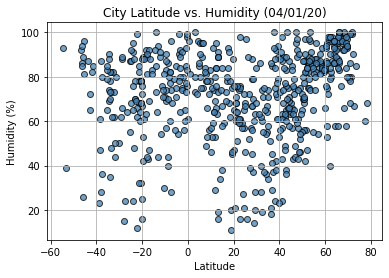

In [70]:
# Generate a scatter plot of latitude vs. humidity
plt.scatter(latitude,humidity, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('latvshumid.png')
plt.show()

#This code is analyzing the relationship between the percent of humidity of a city on 4/1/20 relative to the city's distance from the equator. 
#There doesn't appear to be a linear relationship between latitude and humidity. A majority of the cities' humidity is concentrated over 60% in both hemispheres.
#I believe it has more to do with the city's distance from a body of water that it's distance to the equator.

## Latitude vs. Cloudiness Plot

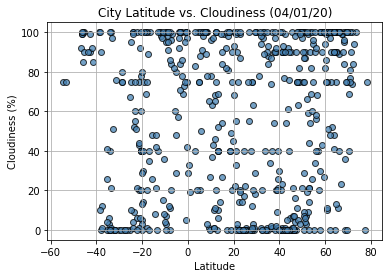

In [71]:
# Generate a scatter plot of latitude vs. cloudiness
plt.scatter(latitude,cloudiness, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('latvscloudy.png')
plt.show()

#This code is analyzing the relationship between the percent of cloudiness of a city on 4/1/20 and the city's distance from the equator. 
#There doesn't appear to be a linear relationship between city latitude. There is a lot of polarization in cloudiness, but it doesn't look like latitude is a significant factor.

## Latitude vs. Wind Speed Plot

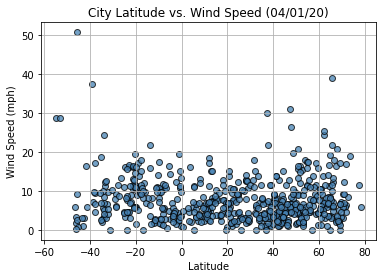

In [72]:
# Generate a scatter plot of latitude vs. wind speed
plt.scatter(latitude,wind_speed, marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('latvswindspeed.png')
plt.show()

#This code is analyzing the relationship between the wind speed (mph) in a city on 4/1/20 and the city's distance from the equator. 
#There doesn't appear to be a relationship between latitude and wind speed, with a large majority of the cities' wind speeds concentrated below 20mph.

## Linear Regression

In [73]:
#Separate the datafames into northern and southern hemispheres.
nh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] >= 0]
sh_clean_city_data = clean_city_data.loc[clean_city_data["Lat"] < 0]
nh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pochutla,15.7432,-96.4661,88.83,59,99,7.54,MX,1635106966
2,Saint Paul Harbor,57.7900,-152.4072,42.93,86,30,7.78,US,1635106967
5,Skibbereen,51.5500,-9.2667,49.80,82,7,16.37,IE,1635106968
6,Norman Wells,65.2820,-126.8329,23.04,93,90,3.44,CA,1635106968
7,Morden,49.1919,-98.1014,46.06,75,100,5.75,CA,1635106730
...,...,...,...,...,...,...,...,...,...
571,Neyshabur,36.2133,58.7958,55.80,21,87,4.14,IR,1635107198
572,Sangar,63.9242,127.4739,20.16,96,100,6.93,RU,1635107198
574,Pedersore,63.6500,22.6833,36.00,96,100,1.01,FI,1635107199
576,Enköping,59.6361,17.0777,51.66,83,100,15.95,SE,1635107199


In [74]:
sh_clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Bluff,-46.6000,168.3333,52.86,92,92,5.99,NZ,1635106718
3,Airai,-8.9266,125.4092,61.09,86,98,1.39,TL,1635106889
4,Avarua,-21.2078,-159.7750,73.45,68,75,11.50,CK,1635106797
10,Oriximiná,-1.7656,-55.8661,88.61,56,73,4.32,BR,1635106970
12,Saint-Philippe,-21.3585,55.7679,72.99,85,43,15.99,RE,1635106754
...,...,...,...,...,...,...,...,...,...
573,Boca do Acre,-8.7522,-67.3978,94.95,40,95,5.55,BR,1635107198
575,Christchurch,-43.5333,172.6333,59.02,87,90,3.00,NZ,1635107147
577,Manoel Urbano,-8.8389,-69.2597,93.97,44,100,2.80,BR,1635107200
579,Wewak,-3.5534,143.6268,78.67,84,100,3.62,PG,1635107201


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : -0.8805948407206085


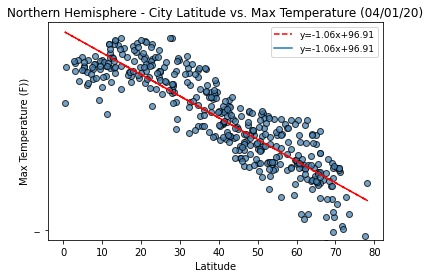

In [75]:
# Generate a scatter plot of latitude vs. max temperature - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')
# plt.yticks(nh_clean_city_data['Max Temp'])

# Perform a linear regression on city latutide vs. max. temperature.
nhmt_slope, nhmt_int, nhmt_r, nhmt_p, nhmt_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Max Temp'])
# Create equation of line to calculate the fit and r-value.
nhmt_fit = nhmt_slope * nh_clean_city_data['Lat'] + nhmt_int
nhmt_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhmt_fit, "r--", "--", label='y={:.2f}x+{:.2f}'.format(nhmt_slope,nhmt_int))
plt.legend(fontsize=9)
plt.savefig('nhlatvstemp.png')

print(f"The r-value is : {nhmt_r}")

plt.show()

#The linear regression and r-value show a fairly strong negative relationship between latitude and max temperature, so it appears the max temperature is lower the farther north one goes from the equator. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is : 0.6970070862702286


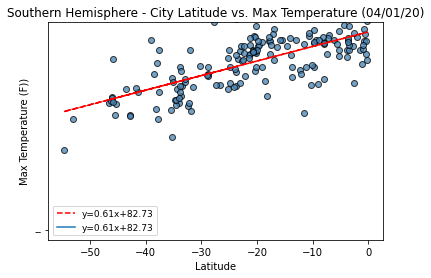

In [83]:
# Generate a scatter plot of latitude vs. max temperature - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Max Temp'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F))')

# Perform a linear regression on city latutide vs. max. temperature.
shmt_slope, shmt_int, shmt_r, shmt_p, shmt_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Max Temp'])
# Create equation of line to calculate the fit and r-value.
shmt_fit = shmt_slope * sh_clean_city_data['Lat'] + shmt_int
shmt_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shmt_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shmt_slope,shmt_int))
plt.legend(fontsize=9)

plt.savefig('shlatvstemp.png')

print(f"The r-value is : {shmt_r}")

plt.show()

#The linear regression and r-value show a fairly moderate positive relationship between latitude and max temperature, so it appears the max temperature is higher the close north one goes to the equator.
#The r-value is not as strong in latitude vs. max temp as it is in the northern hemisphere. This may be because 1. there are fewer samples south of the equator, and 2. the northern hemisphere covers a larger area (up to 80 degrees above the equator, as opposed to less than 60 degrees below the equator.)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.31839701144743304


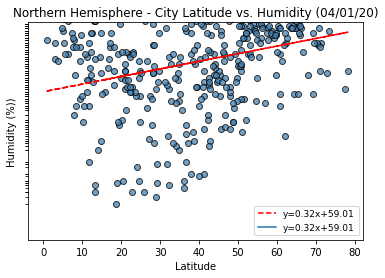

In [84]:
# Generate a scatter plot of latitude vs. humidity - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.yticks(nh_clean_city_data['Humidity'])

# Perform a linear regression on city latutide vs. humidity.
nhh_slope, nhh_int, nhh_r, nhh_p, nhh_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Humidity'])
# Create equation of line to calculate the fit and r-value.
nhh_fit = nhh_slope * nh_clean_city_data['Lat'] + nhh_int
nhh_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhh_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhh_slope,nhh_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvshumid.png')

print(f"The r-value is : {nhh_r}")

plt.show()

#There is a very weak positive relationship between city latitude and humidity in the northern hemisphere.
#This might be because the city's proximity to water might be a stronger factor in determining humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is : 0.10493552750902448


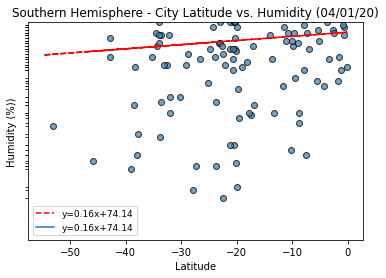

In [85]:
# Generate a scatter plot of latitude vs. humidity - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Humidity'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Humidity (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.yticks(sh_clean_city_data['Humidity'])

# Perform a linear regression on city latutide vs. humidity.
shh_slope, shh_int, shh_r, shh_p, shh_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Humidity'])
# Create equation of line to calculate the fit and r-value.
shh_fit = shh_slope * sh_clean_city_data['Lat'] + shh_int
shh_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shh_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shh_slope,shh_int))
plt.legend(fontsize=9)

plt.savefig('shlatvshumid.png')

print(f"The r-value is : {shh_r}")

plt.show()

#There is a very, very weak positive relationship between city latitude and humidity in the southern hemisphere (practially no relationship at all).
#This might be because the city's proximity to water might be a stronger factor in determining humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.175588283031828


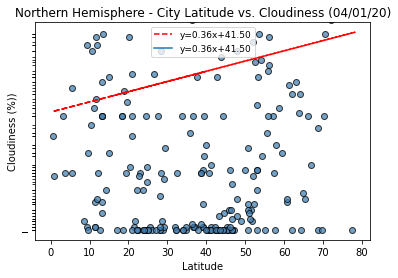

In [86]:
# Generate a scatter plot of latitude vs. cloudiness - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.yticks(nh_clean_city_data['Cloudiness'])

# Perform a linear regression on city latutide vs. cloudiness.
nhc_slope, nhc_int, nhc_r, nhc_p, nhc_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Cloudiness'])
# Create equation of line to calculate the fit and r-value.
nhc_fit = nhc_slope * nh_clean_city_data['Lat'] + nhc_int
nhc_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhc_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhc_slope,nhc_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvscloudy.png')

print(f"The r-value is : {nhc_r}")

plt.show()

#As with humidity, the low r-value indicates the positive relationship between the city latitude and % cloudiness is this data set is negligible.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is : 0.13494238971068084


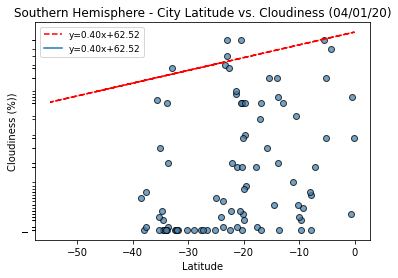

In [87]:
# Generate a scatter plot of latitude vs. cloudiness - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Cloudiness'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.yticks(sh_clean_city_data['Cloudiness'])

# Perform a linear regression on city latutide vs. cloudiness.
shc_slope, shc_int, shc_r, shc_p, shc_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Cloudiness'])
# Create equation of line to calculate the fit and r-value.
shc_fit = shc_slope * sh_clean_city_data['Lat'] + shc_int
shc_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shc_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shc_slope,shc_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvscloudy.png')

print(f"The r-value is : {shc_r}")

plt.show()

#As with humidity, the low r-value indicates the positive relationship between the city latitude and % cloudiness is this data set is negligible (even more so than in the northern hemisphere, but again, factors like a small sample size would come intp play, as well).

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : 0.14911384201259176


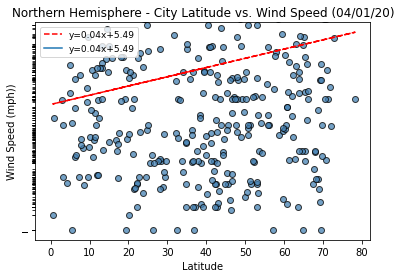

In [88]:
# Generate a scatter plot of latitude vs. wind speed - Northern Hemisphere.
plt.scatter(nh_clean_city_data['Lat'],nh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.yticks(nh_clean_city_data['Wind Speed'])

# Perform a linear regression on city latutide vs. wind speed.
nhws_slope, nhws_int, nhws_r, nhws_p, nhws_std_err = stats.linregress(nh_clean_city_data['Lat'], nh_clean_city_data['Wind Speed'])
# Create equation of line to calculate the fit and r-value.
nhws_fit = nhws_slope * nh_clean_city_data['Lat'] + nhws_int
nhws_r

#Finish plotting the graph with the line of best fit.
plt.plot(nh_clean_city_data['Lat'],nhws_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(nhws_slope,nhws_int))
plt.legend(fontsize=9)

plt.savefig('nhlatvswindspeed.png')

print(f"The r-value is : {nhws_r}")

plt.show()

#It appears the  very low r-value and linear regression shows the positive relationship between wind speed and distance from the equator is negligible.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is : -0.186653115555148


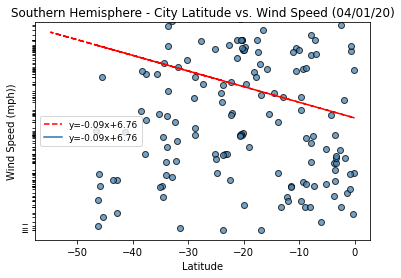

In [89]:
# Generate a scatter plot of latitude vs. wind speed - Southern Hemisphere.
plt.scatter(sh_clean_city_data['Lat'],sh_clean_city_data['Wind Speed'], marker="o", facecolors="steelblue", edgecolors="black", alpha=0.75)
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.yticks(sh_clean_city_data['Wind Speed'])

# Perform a linear regression on city latutide vs. wind speed.
shws_slope, shws_int, shws_r, shws_p, shws_std_err = stats.linregress(sh_clean_city_data['Lat'], sh_clean_city_data['Wind Speed'])
# Create equation of line to calculate the fit and r-value.
shws_fit = shws_slope * sh_clean_city_data['Lat'] + shws_int
shws_r

#Finish plotting the graph with the line of best fit.
plt.plot(sh_clean_city_data['Lat'],shws_fit,"r--", "--", label='y={:.2f}x+{:.2f}'.format(shws_slope,shws_int))
plt.legend(fontsize=9)

plt.savefig('shlatvswindspeed.png')

print(f"The r-value is : {shws_r}")

plt.show()

#It appears the  very low r-value and linear regression shows the negative relationship between wind speed and distance from the equator is negligible.